In [45]:
import numpy as np
import scipy as sp
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt

In [2]:
n=4

In [3]:
def k(x):
    return (1+x)

In [11]:
def D(n):
    h = 1/n
    T = csr_matrix((np.ones(n),(np.arange(0,n),np.arange(1,n+1))))
    return (T-sp.sparse.csr_matrix((np.ones(n),
                                    (np.arange(0,n),np.arange(0,n))),
                        shape=(n,n+1)))/h
def Dm(n):
    h = 1/n
    T = csr_matrix((np.ones(n-1),(np.arange(0,n-1),np.arange(1,n))))
    return (T-sp.sparse.csr_matrix((np.ones(n-1),
                                    (np.arange(0,n-1),np.arange(0,n-1))),
                        shape=(n-1,n)))/h

In [13]:
Dm(4).toarray()

array([[-4.,  4.,  0.,  0.],
       [ 0., -4.,  4.,  0.],
       [ 0.,  0., -4.,  4.]])

In [17]:
# Mesh of inner points
h_global = 1/n
inner_mesh = np.linspace(h_global/2,1-h_global/2,n)
inner_mesh

array([0.125, 0.375, 0.625, 0.875])

In [18]:
[k(x) for x in inner_mesh]

[1.125, 1.375, 1.625, 1.875]

In [19]:
def K(n):
    h = 1/n
    mesh = np.linspace(h/2,1-h/2,n)
    return csr_matrix(([k(x) for x in mesh],
                      (np.arange(0,n),np.arange(0,n))))

In [21]:
Dm(n)*(K(n)*D(n)).toarray()

array([[ 18., -40.,  22.,   0.,   0.],
       [  0.,  22., -48.,  26.,   0.],
       [  0.,   0.,  26., -56.,  30.]])

In [25]:
temp = csr_matrix(([1],([0],[0])),shape=(1,n+1)).toarray()

In [30]:
csr_matrix(([1],([0],[n])),shape=(1,n+1))

<1x5 sparse matrix of type '<class 'numpy.int32'>'
	with 1 stored elements in Compressed Sparse Row format>

In [33]:
sp.sparse.vstack([
    csr_matrix(([1],([0],[0])),shape=(1,n+1)),
    Dm(n)*(K(n)*D(n)),
    csr_matrix(([1],([0],[n])),shape=(1,n+1))]).toarray()

array([[  1.,   0.,   0.,   0.,   0.],
       [ 18., -40.,  22.,   0.,   0.],
       [  0.,  22., -48.,  26.,   0.],
       [  0.,   0.,  26., -56.,  30.],
       [  0.,   0.,   0.,   0.,   1.]])

In [34]:
def A(n):
    return sp.sparse.vstack([
        csr_matrix(([1],([0],[0])),shape=(1,n+1)),
        Dm(n)*(K(n)*D(n)),
        csr_matrix(([1],([0],[n])),shape=(1,n+1))])

In [35]:
A(n).toarray()

array([[  1.,   0.,   0.,   0.,   0.],
       [ 18., -40.,  22.,   0.,   0.],
       [  0.,  22., -48.,  26.,   0.],
       [  0.,   0.,  26., -56.,  30.],
       [  0.,   0.,   0.,   0.,   1.]])

In [36]:
def b(n):
    v = np.zeros(n+1)
    v[0]=0 # boundary conditions
    v[n]=1
    return v

In [39]:
b(n)

array([0., 0., 0., 0., 1.])

In [51]:
n=40
x = spsolve(A(n),b(n))
x

array([0.        , 0.0356231 , 0.07038782, 0.10433454, 0.13750088,
       0.16992191, 0.20163038, 0.23265696, 0.26303034, 0.29277747,
       0.32192364, 0.35049267, 0.37850695, 0.40598763, 0.43295465,
       0.45942687, 0.4854221 , 0.51095725, 0.53604831, 0.56071045,
       0.58495811, 0.60880498, 0.6322641 , 0.65534787, 0.67806812,
       0.70043611, 0.72246261, 0.74415789, 0.76553175, 0.78659358,
       0.80735237, 0.82781671, 0.84799483, 0.86789463, 0.88752369,
       0.90688927, 0.92599835, 0.94485764, 0.96347358, 0.98185238,
       1.        ])

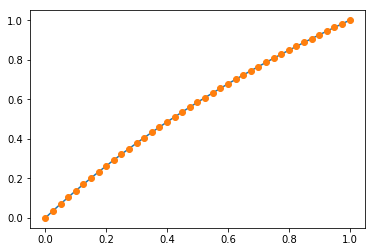

In [52]:
pts = np.linspace(0,1,n+1);
plt.plot(pts,[np.log(1+x)/np.log(2) for x in pts])
plt.plot(pts,x,'o')

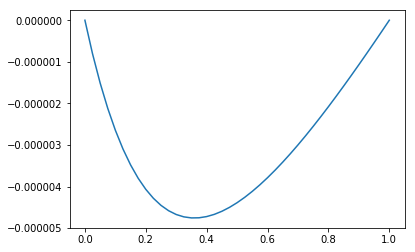

In [53]:
plt.plot(pts,x - [np.log(1+x)/np.log(2) for x in pts])